In [274]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import matplotlib.colors
%matplotlib inline

In [275]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

# Exploratory Data Analysis

In [276]:
df=pd.read_csv("oec.csv")

**The dataset contains 3584 planets and 25 columns**

In [277]:
df.head()

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,InclinationDeg,SurfaceTempK,AgeGyr,DiscoveryMethod,DiscoveryYear,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
0,HD 143761 b,0,1.0450,NaN,39.845800,0.2196,0.037,270.6,NaN,NaN,NaN,NaN,NaN,RV,2016.0,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
1,HD 143761 c,0,0.0790,NaN,102.540000,0.4123,0.050,190.0,NaN,NaN,NaN,NaN,NaN,RV,2016.0,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
2,KOI-1843.03,0,0.0014,0.054,0.176891,0.0048,NaN,NaN,NaN,NaN,72.00,NaN,NaN,transit,2012.0,13/07/15,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
3,KOI-1843.01,0,NaN,0.114,4.194525,0.0390,NaN,NaN,NaN,NaN,89.38,NaN,NaN,transit,NaN,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
4,KOI-1843.02,0,NaN,0.071,6.356006,0.0520,NaN,NaN,NaN,NaN,88.24,NaN,NaN,transit,NaN,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial


In [278]:
df.describe()

,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,InclinationDeg,SurfaceTempK,AgeGyr,DiscoveryYear,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr
count,3584.000000,1313.000000,2774.000000,3485.000000,1406.000000,1108.000000,328.000000,43.000000,46.000000,665.000000,741.000000,2.000000,3574.000000,2133.000000,3416.000000,3263.000000,2509.000000,3455.000000,517.000000
mean,0.097656,2.890944,0.371190,537.248317,2.000170,0.166910,150.363823,144.200847,90.624476,82.973840,871.714170,1.502750,2013.300504,554.912346,0.983225,1.495629,0.016228,5505.514501,4.635355
std,0.424554,10.204485,0.416871,7509.660676,19.352699,0.189760,117.859945,127.865952,93.047968,21.402768,699.314463,2.117431,6.159674,847.566803,0.319063,3.071298,0.193495,1204.271777,4.657679
min,0.000000,0.000008,0.002300,0.090706,0.004420,0.000000,-233.000000,-174.640000,-5.112604,-0.000543,102.200000,0.005500,1781.000000,1.295000,0.012000,0.000014,-2.090000,540.000000,0.002200
25%,0.000000,0.150000,0.141062,4.757940,0.053000,0.020000,66.750000,37.167396,1.509500,85.058000,321.800000,0.754125,2013.000000,60.000000,0.830000,0.810000,-0.050000,5113.000000,2.000000
50%,0.000000,0.940000,0.209600,13.071630,0.169500,0.100000,139.700000,162.280000,69.821251,87.800000,719.600000,1.502750,2014.000000,333.000000,0.977000,1.000000,0.020000,5634.000000,4.000000
75%,0.000000,2.500000,0.321518,49.514000,1.250000,0.247282,243.000000,252.625834,169.175000,89.140000,1310.900000,2.251375,2016.000000,773.130000,1.105000,1.250000,0.100000,5940.000000,6.300000
max,3.000000,263.000000,6.000000,320000.000000,662.000000,0.956000,791.000000,339.300000,320.800000,305.000000,7112.000000,3.000000,2017.000000,8500.000000,4.500000,51.100000,0.560000,29300.000000,80.000000


**Let's group the number of discoveries by discovery method and year**

In [279]:
df.groupby(['DiscoveryMethod', 'DiscoveryYear']).size().unstack().T.fillna(0).astype(int).sort_values(by=['DiscoveryYear'])

DiscoveryMethod,RV,imaging,microlensing,timing,transit
DiscoveryYear,,,,,
1992.0,1,0,0,3,0
1994.0,0,0,0,1,0
1995.0,1,0,0,0,0
1996.0,6,0,0,0,0
1997.0,1,0,0,0,0
1998.0,5,0,0,0,0
1999.0,10,0,0,0,1
2000.0,20,0,0,0,0
2001.0,13,0,0,0,0


### Cuurently Transit method has become the most popular method for finding exoplanets

### RV 
A star with a planet will move in its own small orbit in response to the planet's gravity. This leads to variations in the speed with which the star moves toward or away from Earth, i.e. the variations are in the radial velocity of the star with respect to Earth. The radial velocity can be deduced from the displacement in the parent star's spectral lines due to the Doppler effect.
### Direct Imaging
(Usually in infrared)
### Microlensing
Planets found due to gravitational lensing
### Timing
Similar to transit method checking for time intervals between dips

### Checking for correlation in the data

(10.5, 0.5)


(10.0, 0)

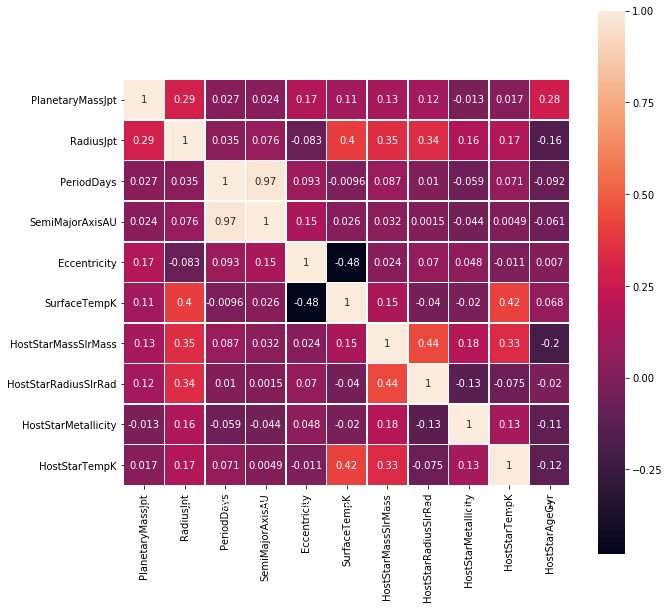

In [280]:
numericCols=['PlanetaryMassJpt', 'RadiusJpt','PeriodDays', 'SemiMajorAxisAU', 'Eccentricity',
                 'SurfaceTempK','HostStarMassSlrMass', 'HostStarRadiusSlrRad',
                 'HostStarMetallicity','HostStarTempK','HostStarAgeGyr']
fig, ax = plt.subplots(figsize=(10,10))
ax=sns.heatmap(df[numericCols].corr(), annot=True, linewidths=.5,square=True)
print(ax.get_ylim())
ax.set_ylim(10.0, 0) #Due to few cropping issues in seaborn

### Interesting correlations
- Surface Temp and Radius of planet
- Host star mass and Radius of planet
- Eccentricity and surface temperature

**Correlation does not imply causation!**

### Obvious correlations
- Host star mass and host star temp
- Host star mass and host star radius
- SurfaceTemp and Host star temp
- Period and semi major axis




**Finding the percentage of null values in each column :**

In [281]:
df.isna().mean().sort_values(ascending=False).head(15)*100

AgeGyr                  99.944196
LongitudeDeg            98.800223
AscendingNodeDeg        98.716518
PeriastronDeg           90.848214
HostStarAgeGyr          85.574777
InclinationDeg          81.445312
SurfaceTempK            79.324777
Eccentricity            69.084821
PlanetaryMassJpt        63.364955
SemiMajorAxisAU         60.770089
DistFromSunParsec       40.485491
HostStarMetallicity     29.994420
RadiusJpt               22.600446
HostStarRadiusSlrRad    8.956473 
HostStarMassSlrMass     4.687500 
dtype: float64

**We find AgeGyr, LongitudeDeg, AscendingNodeDeg, PeriastronDeg have more than 75% null values and hence won't be of much use**

**Let's try finding the distribution of some columns like radius, mass, time period, semi major axis**

/home/kousik/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/kousik/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


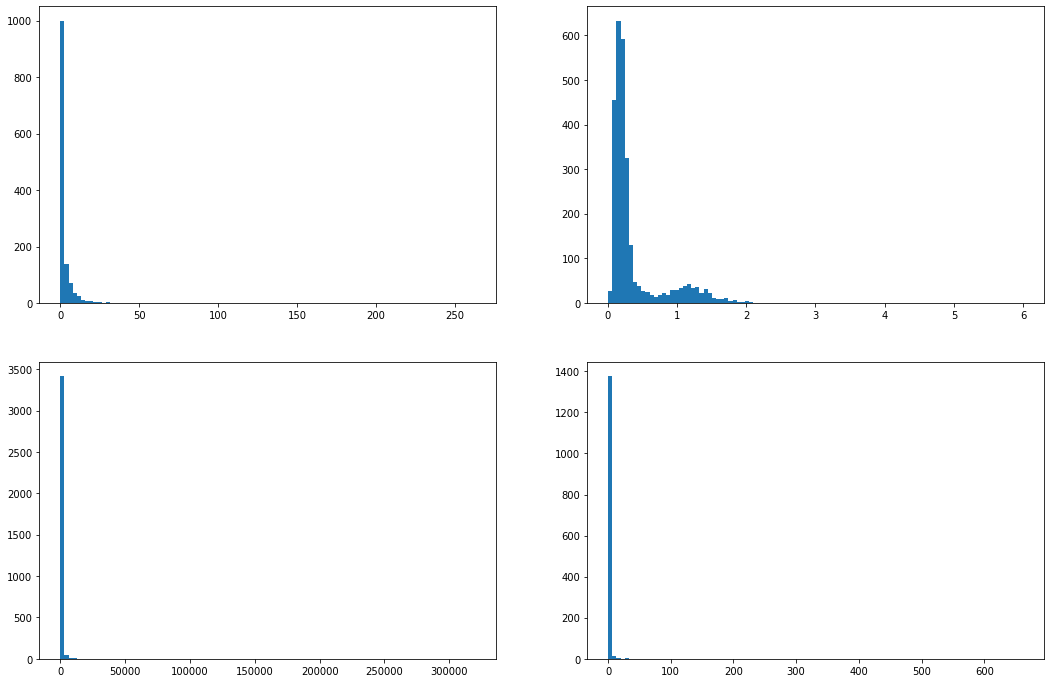

In [282]:
fig, axes = plt.subplots(2, 2,figsize=(18,12))
axes[0,0].hist(df["PlanetaryMassJpt"],bins=100)
axes[0,1].hist(df["RadiusJpt"],bins=100)
axes[1,0].hist(df["PeriodDays"],bins=100)
axes[1,1].hist(df["SemiMajorAxisAU"],bins=100)
plt.show()

**As seen from histograms data is highly skewed**


**If we attempt regression on such data it will fail miserably**

**Attempting to plot a scatter of Mass vs Radius we find that the skew ruins the plot**

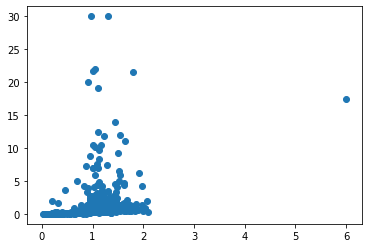

In [283]:
df=df.dropna(subset=['PlanetaryMassJpt', 'RadiusJpt'])#Remove null values
plt.scatter(df["RadiusJpt"],df["PlanetaryMassJpt"])

#### Removing outliers to get a good scatter plot

In [284]:
df["RadiusJpt"].quantile(0.999)

3.972030000000331

#### Removing outliers with values more than the 99.9th percentile we get an approximately polynomial graph between radius and mass as expected

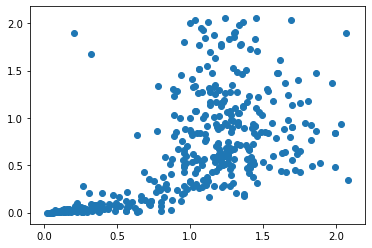

In [285]:
dfremoved=df[df["RadiusJpt"]<df["RadiusJpt"].quantile(0.999)]
dfremoved=dfremoved[dfremoved["PlanetaryMassJpt"]<dfremoved["RadiusJpt"].quantile(0.999)]
plt.scatter(dfremoved["RadiusJpt"],dfremoved["PlanetaryMassJpt"])

### Log transformation
#### Instead of trying to fit a polynomial we fill log transform the variables(Take their log values) and fit a straight line through them
#### The slope of the line would give the degree of the polynomial

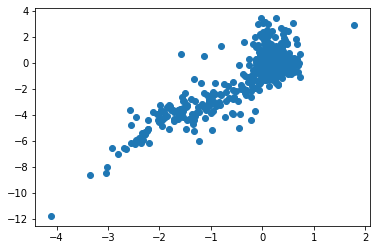

In [286]:
df["PlanetaryMassJptlog"]=df["PlanetaryMassJpt"].apply(np.log)
df["RadiusJptlog"]=df["RadiusJpt"].apply(np.log)

plt.scatter(df["RadiusJptlog"],df["PlanetaryMassJptlog"])

### Linear regression

In [287]:
linearRegressor = LinearRegression()

In [288]:
xTrain=df[["RadiusJptlog"]]
yTrain=df["PlanetaryMassJptlog"]

In [289]:
linearRegressor.fit(xTrain,yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

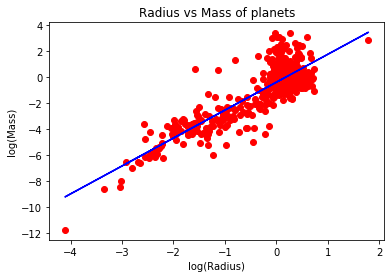

In [290]:
plt.scatter(xTrain, yTrain, color = 'red')
plt.plot(xTrain, linearRegressor.predict(xTrain), color = 'blue')
plt.title('Radius vs Mass of planets')
plt.xlabel('log(Radius)')
plt.ylabel('log(Mass)')
plt.show()

**Correlation coefficient**

In [291]:
linearRegressor.score(xTrain,yTrain)

0.7419577761281136

**Slope of line**

In [292]:
linearRegressor.coef_

array([2.1513155])

**Intercept**

In [293]:
linearRegressor.intercept_

-0.3983624209761425

$log(Mass)=2.2*log(Radius)-0.45$

$Predicted : Mass=0.637*Radius^{2.2}$


$Actual : Mass=c*Radius^3$

### Why is this incorrect?

## K-means Clustering

**We will try clustering the planets into two groups based on mass and radius naturallywe expect them to be either rocky or gas giant**

In [294]:
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

In [295]:
X=np.array(df[["RadiusJptlog","PlanetaryMassJptlog"]])
X=X.reshape(-1,2)

In [296]:
km.fit(X)
y_km = km.fit_predict(X)


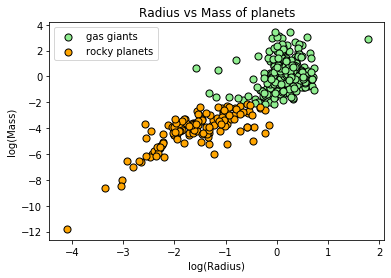

In [297]:
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    edgecolor='black',
    label='gas giants'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    edgecolor='black',
    label='rocky planets'
)
plt.title('Radius vs Mass of planets')
plt.xlabel('log(Radius)')
plt.ylabel('log(Mass)')

plt.legend(scatterpoints=1)
plt.show()

### TASK: Try checking if 2 is the best value for k (i.e are there only 2 clusters)

In [298]:
df["cluster"]=y_km

In [299]:
df["MassRadiusLogRatio"]=df["PlanetaryMassJptlog"]/df["RadiusJptlog"]

In [300]:
df.groupby("cluster").agg({"MassRadiusLogRatio":"mean"})

,MassRadiusLogRatio
cluster,
0,NaN
1,3.351834


In [301]:
df["MassRadiusCubeRatio"]=df["PlanetaryMassJpt"]/df["RadiusJpt"]**3

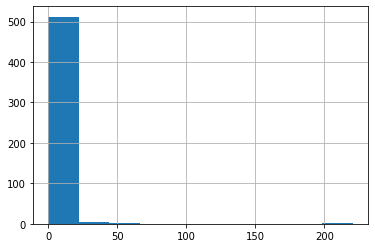

In [302]:
df["MassRadiusCubeRatio"].hist()

In [303]:
df.groupby("cluster").agg({"MassRadiusCubeRatio":"mean"})

,MassRadiusCubeRatio
cluster,
0,2.264171
1,3.575266


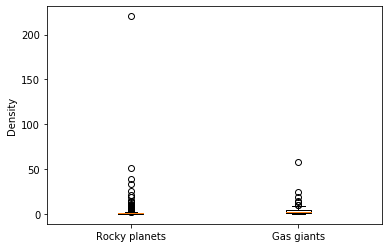

In [304]:
plt.boxplot([df[df["cluster"]==0]["MassRadiusCubeRatio"],df[df["cluster"]==1]["MassRadiusCubeRatio"]])
positions = (1, 2)
labels = ("Rocky planets", "Gas giants")
plt.ylabel('Density')
plt.xticks(positions, labels)
plt.show()

In [305]:
df=pd.read_csv("oec.csv")

## Verifying keplers 3rd law

### Keplers 3rd Law
$T^2\propto a^3$

where a is semi major axis

**Plotting a scatter plot of period vs semi major axis**

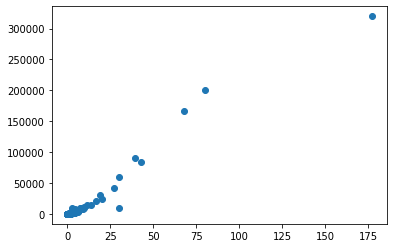

In [306]:
plt.scatter(df["SemiMajorAxisAU"],df["PeriodDays"])

In [307]:
df=df.dropna(subset=['SemiMajorAxisAU', 'PeriodDays']) #Removing null values

### Doing log transformation and linear regression similar to before

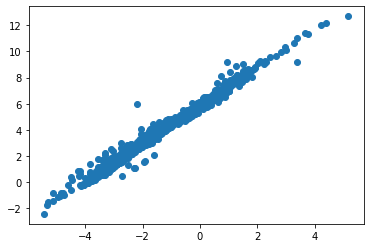

In [308]:
df["SemiMajorAxisAUlog"]=df["SemiMajorAxisAU"].apply(np.log)
df["PeriodDayslog"]=df["PeriodDays"].apply(np.log)
plt.scatter(df["SemiMajorAxisAUlog"],df["PeriodDayslog"])

In [309]:
linearRegressor = LinearRegression()

In [310]:
xTrain=df[["SemiMajorAxisAUlog"]]
yTrain=df["PeriodDayslog"]

In [311]:
yTrain.shape

(1359,)

In [312]:
xTrain.describe()

,SemiMajorAxisAUlog
count,1359.000000
mean,-1.417422
std,1.744565
min,-5.421616
25%,-2.951716
50%,-1.857899
75%,0.173953
max,5.176150


In [313]:
yTrain.describe()

count    1359.000000
mean     3.790160   
std      2.571380   
min     -2.400129   
25%      1.487257   
50%      3.196671   
75%      6.069350   
max      12.676076  
Name: PeriodDayslog, dtype: float64

In [314]:
linearRegressor.fit(xTrain,yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

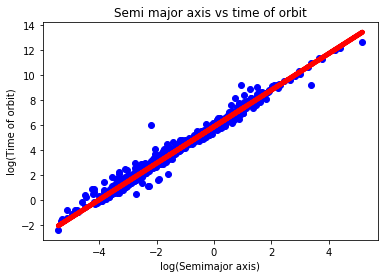

In [315]:
plt.scatter(xTrain, yTrain, color = 'blue')
plt.plot(xTrain, linearRegressor.predict(xTrain), color = 'red',linewidth=5.0)
plt.title('Semi major axis vs time of orbit')
plt.xlabel('log(Semimajor axis)')
plt.ylabel('log(Time of orbit)')
plt.show()

**Correlation coefficient**

In [316]:
linearRegressor.score(xTrain,yTrain)

0.9884410393078242

**Slope**

**(Expected 1.5)**

In [317]:
linearRegressor.coef_

array([1.46539408])

In [318]:
linearRegressor.intercept_

5.867242385585538

## Again this is an incorrect analysis!
## The proportionality constant depends on mass of host star
## Hence Keplers law should be verified within a star system


In [319]:
df.head()

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,InclinationDeg,SurfaceTempK,AgeGyr,DiscoveryMethod,DiscoveryYear,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn,SemiMajorAxisAUlog,PeriodDayslog
0,HD 143761 b,0,1.0450,NaN,39.845800,0.2196,0.037,270.6,NaN,NaN,NaN,NaN,NaN,RV,2016.0,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets,-1.515948,3.685017
1,HD 143761 c,0,0.0790,NaN,102.540000,0.4123,0.050,190.0,NaN,NaN,NaN,NaN,NaN,RV,2016.0,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets,-0.886004,4.630253
2,KOI-1843.03,0,0.0014,0.054,0.176891,0.0048,NaN,NaN,NaN,NaN,72.00,NaN,NaN,transit,2012.0,13/07/15,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial,-5.339139,-1.732220
3,KOI-1843.01,0,NaN,0.114,4.194525,0.0390,NaN,NaN,NaN,NaN,89.38,NaN,NaN,transit,NaN,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial,-3.244194,1.433780
4,KOI-1843.02,0,NaN,0.071,6.356006,0.0520,NaN,NaN,NaN,NaN,88.24,NaN,NaN,transit,NaN,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial,-2.956512,1.849400


### Making a linear regression function

In [320]:
def linreg(x,y):
    x=np.array(x).reshape(-1,1)
    y=np.array(y)
    linearRegressor = LinearRegression()
    linearRegressor.fit(x,y)
    return len(y),linearRegressor.score(x,y),linearRegressor.coef_[0],linearRegressor.intercept_
    

### Initializing variables for iterating

In [321]:
ra=""
dec=""
x=[]
y=[]
counts=[]
scores=[]
slopes=[]
intercepts=[]


### Planets from the same system occur together
**So we'll do linear regression on the planets in the same star system and form a new dataframe with the results**

In [322]:
for row in df.itertuples(index=True, name='Pandas'):
    if(ra==getattr(row, "RightAscension") and dec==getattr(row, "Declination")):
        x.append(getattr(row, "SemiMajorAxisAUlog"))
        y.append(getattr(row, "PeriodDayslog"))
    else:
        if(len(x)>=2):
            count,score,slope,intercept=linreg(x,y)
            counts.append(count)
            scores.append(score)
            slopes.append(slope)
            intercepts.append(intercept)

        ra=getattr(row, "RightAscension")
        dec=getattr(row, "Declination")
        x=[getattr(row, "SemiMajorAxisAUlog")]
        y=[getattr(row, "PeriodDayslog")]
        
linreg_results=pd.DataFrame({"Count":counts,"Score":scores,"Slope":slopes,"Intercept":intercepts})  

**This method is inefficient as it is not vectorised**
### TASK : Try vectorising the above code

In [323]:
linreg_results.head()

,Count,Score,Slope,Intercept
0,2,1.000000,1.500509,5.959710
1,3,0.999979,1.506220,6.310834
2,3,0.999999,1.498470,5.872017
3,2,1.000000,1.534681,5.834513
4,2,1.000000,1.499987,5.880752


In [324]:
linreg_results.describe()

,Count,Score,Slope,Intercept
count,217.00000,217.000000,217.000000,217.000000
mean,2.62212,0.998907,1.518852,6.026499
std,1.11599,0.009595,0.342881,1.134709
min,2.00000,0.888038,0.818987,4.502366
25%,2.00000,1.000000,1.497343,5.838710
50%,2.00000,1.000000,1.499910,5.901609
75%,3.00000,1.000000,1.501965,6.027985
max,9.00000,1.000000,6.437564,21.895963


**The standard deviation of slope is unnaturally high lets make a boxplot to find the problem**

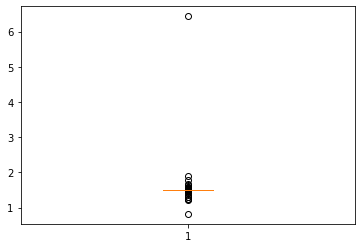

In [325]:
plt.boxplot(linreg_results["Slope"])
plt.show()

**We find one outlier having a very high slope so let's check after removing it**

In [326]:
linreg_results=linreg_results[linreg_results["Slope"]<6]
linreg_results.describe()

,Count,Score,Slope,Intercept
count,216.000000,216.000000,216.000000,216.000000
mean,2.625000,0.998902,1.496080,5.953029
std,1.117774,0.009617,0.071163,0.341733
min,2.000000,0.888038,0.818987,4.502366
25%,2.000000,1.000000,1.497307,5.838097
50%,2.000000,1.000000,1.499906,5.901068
75%,3.000000,1.000000,1.501951,6.023135
max,9.000000,1.000000,1.892012,8.426045


**The standard deviation of slope is now reasonably good**

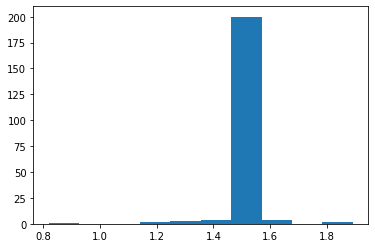

In [327]:
plt.hist(linreg_results["Slope"])
plt.show()

# HR Diagram

<img src="hrdiag.png" style="height:700px">

In [328]:
df["Luminosity"]=df["HostStarRadiusSlrRad"]**2*df["HostStarTempK"]**4
df["Luminositylog"]=np.log(df["Luminosity"])

### Plotting the HR Diagram we find a few outliers ruining the plot so we remove them
### The dot size in the scatterplot is mapped to the size of the star

In [329]:
cmap = matplotlib.colors.ListedColormap(["blue","blue","blue","blue","yellow","darkorange","red","red","red"][::-1])

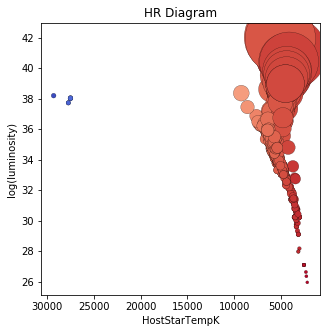

In [330]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df["HostStarTempK"],df["Luminositylog"],c=df["HostStarTempK"],s=100*df["HostStarRadiusSlrRad"], cmap="coolwarm_r",edgecolor='black', linewidth=0.2)
plt.gca().invert_xaxis()
plt.title('HR Diagram')
plt.xlabel('HostStarTempK')
plt.ylabel('log(luminosity)')
plt.show()

In [331]:
df=df[df["HostStarTempK"]<25000]

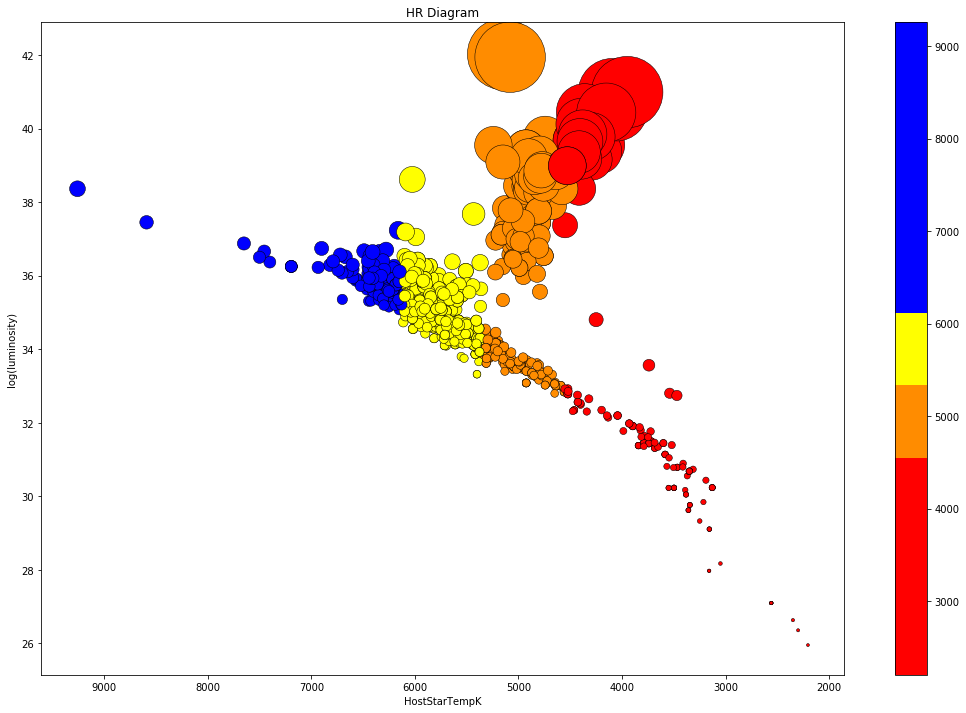

In [332]:
fig = plt.figure(figsize=(18, 12))
points=plt.scatter(df["HostStarTempK"],df["Luminositylog"],c=df["HostStarTempK"],s=100*df["HostStarRadiusSlrRad"], cmap=cmap,edgecolor='black', linewidth=0.5)
plt.colorbar(points)
plt.gca().invert_xaxis()
plt.title('HR Diagram')
plt.xlabel('HostStarTempK')
plt.ylabel('log(luminosity)')
plt.show()

### As you can see the HR diagram provides a clean separation between the main sequence stars and giants

### TASK: Try clustering the HR diagram into the main sequence and giants

## Habitability

#### A planet is habitable if it falls inside the habitable zone of the host star, where liquid water

$\large inner radius(AU)=\sqrt{\frac{L}{1.1}}$

$\large outer radius(AU)=\sqrt{\frac{L}{0.53}}$

$\small L = Luminosity\:of\:host\:star$

**If you want to know where these values came from check out this paper**

Kasting, James; Whitmire, Daniel; and Reynolds, Ray (1993). Habitable zones around main sequence stars. Icarus 101: 108-128.

In [333]:
df['Luminosity'] = df['HostStarRadiusSlrRad']**2  * (df['HostStarTempK']/5777)**4

In [334]:
#add habitable zone boundaries
df['HabZoneOut'] = np.sqrt(df['Luminosity']/0.53)
df['HabZoneIn'] = np.sqrt(df['Luminosity']/1.1)

In [335]:
habitable_zone=df[(df["SemiMajorAxisAU"]>df["HabZoneIn"]) & (df["SemiMajorAxisAU"]<df["HabZoneOut"])]
habitable_zone

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,InclinationDeg,SurfaceTempK,AgeGyr,DiscoveryMethod,DiscoveryYear,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn,SemiMajorAxisAUlog,PeriodDayslog,Luminosity,Luminositylog,HabZoneOut,HabZoneIn
55,38 Vir b,0,4.510000,NaN,825.900000,1.820000,0.030000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.0,17/02/20,12 53 11.16,-03 33 11.2,NaN,1.1800,1.4500,7.000000e-02,6557.0,1.90,Confirmed planets,5.988365e-01,6.716474,3.489372,35.896281,2.565876,1.781055
91,HD 183263 b,0,3.635000,NaN,625.100000,1.486000,0.372800,232.900000,NaN,NaN,NaN,NaN,NaN,RV,2004.0,15/08/15,19 28 24.6,+08 21 28.9,55.1000,1.1210,1.1170,3.020000e-01,5936.0,NaN,Confirmed planets,3.960879e-01,6.437912,1.390825,34.976456,1.619938,1.124449
230,Gliese 3293 b,0,0.076000,NaN,30.600000,0.143400,0.090000,NaN,NaN,NaN,NaN,NaN,NaN,RV,2014.0,14/11/25,04 28 35.72,-25 10 08.9,18.2000,0.4200,0.4040,2.000000e-02,3466.0,NaN,Confirmed planets,-1.942117e+00,3.421000,0.021148,30.790345,0.199754,0.138656
232,Gliese 3293 c,0,0.027000,NaN,48.140000,0.193900,0.130000,NaN,NaN,NaN,NaN,NaN,NaN,RV,2014.0,14/11/25,04 28 35.72,-25 10 08.9,18.2000,0.4200,0.4040,2.000000e-02,3466.0,NaN,Controversial,-1.640413e+00,3.874113,0.021148,30.790345,0.199754,0.138656
270,HD 165155 b,0,2.890000,NaN,434.500000,1.130000,0.200000,211.000000,NaN,NaN,NaN,NaN,NaN,RV,2016.0,16/04/02,18 05 57,-29 04 58,64.9800,1.0200,0.9500,9.000000e-02,5426.0,11.00,Confirmed planets,1.222176e-01,6.074196,0.702355,34.293243,1.151173,0.799065
271,HD 210277 b,0,1.230000,NaN,442.100000,1.100000,0.472000,NaN,NaN,NaN,NaN,240.3,NaN,RV,1998.0,06/09/06,22 09 29,-07 32 32,21.2900,1.0900,1.1000,1.900000e-01,5532.0,NaN,Confirmed planets,9.531018e-02,6.091536,1.017430,34.663839,1.385525,0.961736
314,HD 125612 b,0,3.000000,NaN,502.000000,1.370000,0.460000,NaN,NaN,NaN,NaN,224.5,NaN,RV,2007.0,10/12/06,14 20 54,-17 28 53,52.8200,1.1000,1.0500,2.400000e-01,5897.0,NaN,Confirmed planets,3.148107e-01,6.218600,1.196999,34.826376,1.502827,1.043159
334,HD 4732 c,0,2.370000,NaN,2732.000000,4.600000,0.230000,NaN,NaN,NaN,NaN,NaN,NaN,RV,2012.0,12/10/26,00 49 13,-24 08 12,56.5000,1.7400,5.4000,1.000000e-02,4959.0,NaN,Confirmed planets,1.526056e+00,7.912789,15.832682,37.408635,5.465618,3.793856
381,Gliese 876 c,0,0.842900,NaN,30.076600,0.135985,0.253900,117.120000,-104.600000,-1.290000,53.060000,NaN,NaN,RV,2000.0,15/06/08,22 53 13,-14 15 13,4.6900,0.3700,0.3761,1.900000e-01,3129.0,NaN,Confirmed planets,-1.995211e+00,3.403747,0.012174,30.238075,0.151556,0.105199
410,Earth,0,0.003146,0.091130,365.242200,1.000000,0.016732,102.930059,100.466916,-5.112604,-0.000543,NaN,NaN,NaN,NaN,12/01/01,NaN,NaN,NaN,1.0000,1.0000,1.000000e-08,5778.0,4.57,Solar System,1.800000e-07,5.900561,1.000693,34.647252,1.374081,0.953793


In [336]:
habitable_zone=habitable_zone[(habitable_zone["PlanetaryMassJpt"]>0.0015) & (habitable_zone["PlanetaryMassJpt"]<0.03)]
habitable_zone

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,InclinationDeg,SurfaceTempK,AgeGyr,DiscoveryMethod,DiscoveryYear,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn,SemiMajorAxisAUlog,PeriodDayslog,Luminosity,Luminositylog,HabZoneOut,HabZoneIn
232,Gliese 3293 c,0,0.027000,NaN,48.140000,0.19390,0.130000,NaN,NaN,NaN,NaN,NaN,NaN,RV,2014.0,14/11/25,04 28 35.72,-25 10 08.9,18.2000,0.4200,0.404,2.000000e-02,3466.0,NaN,Controversial,-1.640413e+00,3.874113,0.021148,30.790345,0.199754,0.138656
410,Earth,0,0.003146,0.091130,365.242200,1.00000,0.016732,102.930059,100.466916,-5.112604,-0.000543,NaN,NaN,NaN,NaN,12/01/01,NaN,NaN,NaN,1.0000,1.000,1.000000e-08,5778.0,4.57,Solar System,1.800000e-07,5.900561,1.000693,34.647252,1.374081,0.953793
1123,Wolf 1061 c,0,0.013400,NaN,17.867000,0.08427,0.190000,37.000000,NaN,NaN,NaN,NaN,NaN,RV,2015.0,15/12/27,16 30 18.05803,-12 39 45.3232,4.2922,0.2500,0.260,-5.000000e-02,3345.0,NaN,Confirmed planets,-2.473729e+00,2.882955,0.007598,29.766741,0.119735,0.083112
1919,Gliese 667 C f,2,0.008493,NaN,39.026000,0.15600,0.030000,103.132403,34.000000,NaN,NaN,NaN,NaN,RV,2013.0,13/06/25,17 18 57,-34 59 23,6.9700,0.3300,0.410,NaN,3350.0,NaN,"Controversial, Planets in binary systems, S-type",-1.857899e+00,3.664228,0.019008,30.683666,0.189379,0.131454
1971,Proxima Centauri b,2,0.004089,NaN,11.186000,0.04850,NaN,NaN,110.000000,NaN,NaN,234.0,NaN,RV,2016.0,16/08/22,14 39 36.204,-60 50 08.23,1.2950,0.1200,0.141,NaN,3050.0,NaN,"Confirmed planets, Planets in binary systems, S-type",-3.026191e+00,2.414663,0.001545,28.173597,0.053985,0.037473
2569,TRAPPIST-1 e,0,0.001950,0.083658,6.099615,0.02817,NaN,NaN,NaN,NaN,89.860000,251.3,NaN,transit,2017.0,17/02/22,23 06 30.34,-05 02 36.44,12.1000,0.0802,0.117,4.000000e-02,2559.0,NaN,Confirmed planets,-3.569498e+00,1.808226,0.000527,27.098325,0.031534,0.021889
2759,Gliese 581 g,0,0.009752,NaN,36.500000,0.14600,0.000000,NaN,NaN,NaN,NaN,230.9,NaN,RV,2010.0,14/07/04,15 19 26,-07 43 20,6.2100,0.3100,0.300,-1.350000e-01,3498.0,NaN,Retracted planet candidate,-1.924149e+00,3.597312,0.012098,30.231841,0.151084,0.104872


In [337]:
habitable_zone[["PlanetIdentifier","DistFromSunParsec"]].sort_values(by=["DistFromSunParsec"])

,PlanetIdentifier,DistFromSunParsec
1971,Proxima Centauri b,1.2950
1123,Wolf 1061 c,4.2922
2759,Gliese 581 g,6.2100
1919,Gliese 667 C f,6.9700
2569,TRAPPIST-1 e,12.1000
232,Gliese 3293 c,18.2000
410,Earth,NaN


## TASK: Instead of hardcoding the parameters for habitability try finding the similarity of each exoplanet with earth and hence the most earth like exoplanets

In [338]:
df[df["ListsPlanetIsOn"]=="Solar System"]

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,InclinationDeg,SurfaceTempK,AgeGyr,DiscoveryMethod,DiscoveryYear,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn,SemiMajorAxisAUlog,PeriodDayslog,Luminosity,Luminositylog,HabZoneOut,HabZoneIn
408,Mercury,0,0.000174,0.034902,87.9700,0.387098,0.205637,77.457719,252.251667,48.339618,7.005594,NaN,NaN,NaN,NaN,12/01/01,NaN,NaN,NaN,1.0,1.0,1.000000e-08,5778.0,4.57,Solar System,-9.490763e-01,4.476996,1.000693,34.647252,1.374081,0.953793
409,Venus,0,0.002564,0.086565,224.7000,0.723321,0.006764,131.767557,181.979708,76.672615,3.397775,NaN,NaN,NaN,NaN,12/01/01,NaN,NaN,NaN,1.0,1.0,1.000000e-08,5778.0,4.57,Solar System,-3.239021e-01,5.414766,1.000693,34.647252,1.374081,0.953793
410,Earth,0,0.003146,0.091130,365.2422,1.000000,0.016732,102.930059,100.466916,-5.112604,-0.000543,NaN,NaN,NaN,NaN,12/01/01,NaN,NaN,NaN,1.0,1.0,1.000000e-08,5778.0,4.57,Solar System,1.800000e-07,5.900561,1.000693,34.647252,1.374081,0.953793
411,Mars,0,0.000338,0.048489,686.9800,1.523712,0.093365,-23.917448,-4.568132,49.713210,1.851819,NaN,NaN,NaN,NaN,12/01/01,NaN,NaN,NaN,1.0,1.0,1.000000e-08,5778.0,4.57,Solar System,4.211497e-01,6.532305,1.000693,34.647252,1.374081,0.953793
412,Jupiter,0,1.000000,1.000000,4332.8200,5.202480,0.048536,14.274952,34.334792,100.292827,1.298614,NaN,NaN,NaN,NaN,12/01/01,NaN,NaN,NaN,1.0,1.0,1.000000e-08,5778.0,4.57,Solar System,1.649135e+00,8.373974,1.000693,34.647252,1.374081,0.953793
413,Saturn,0,0.299000,0.832944,10755.6700,9.541499,0.055508,92.861361,50.075713,113.639987,2.494241,NaN,NaN,NaN,NaN,12/01/01,NaN,NaN,NaN,1.0,1.0,1.000000e-08,5778.0,4.57,Solar System,2.255651e+00,9.283188,1.000693,34.647252,1.374081,0.953793
414,Uranus,0,0.045700,0.362775,30687.1530,19.187979,0.046857,172.434044,314.202766,73.962502,0.772981,NaN,NaN,NaN,1781.0,12/01/01,NaN,NaN,NaN,1.0,1.0,1.000000e-08,5778.0,4.57,Solar System,2.954284e+00,10.331599,1.000693,34.647252,1.374081,0.953793
415,Neptune,0,0.053953,0.352219,60190.0300,30.069528,0.008954,46.681587,304.222893,131.786359,1.770055,NaN,NaN,NaN,1846.0,12/01/01,NaN,NaN,NaN,1.0,1.0,1.000000e-08,5778.0,4.57,Solar System,3.403512e+00,11.005262,1.000693,34.647252,1.374081,0.953793
416,Pluto,0,0.000008,0.016438,90553.0200,39.486860,0.248852,224.097026,238.965350,110.301680,17.141043,NaN,NaN,NaN,1930.0,12/01/01,NaN,NaN,NaN,1.0,1.0,1.000000e-08,5778.0,4.57,Solar System,3.675968e+00,11.413691,1.000693,34.647252,1.374081,0.953793


### Task: Try clustering the planets in our solar system based on density ans verify if they form two clusters for rocky planets and gas giants